* Are there variables that are particularly significant in terms of explaining the answer to your project question?
* Are there significant differences between subgroups in your data that may be relevant to your project aim?
* Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
* What are the most appropriate tests to use to analyze these relationships?

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('../data/SeoulBikeData.pkl')

In [8]:
df.shape

(8760, 14)

In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

First, we want to know if the average is 

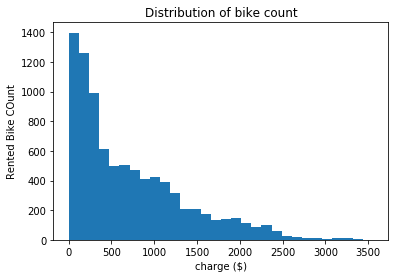

In [6]:
_ = plt.hist(df['Rented Bike Count'], bins=30)
_ = plt.xlabel('charge ($)')
_ = plt.ylabel('Rented Bike COunt')
_ = plt.title('Distribution of bike count')

In [7]:
mean = np.mean(df['Rented Bike Count'])
std = np.std(df['Rented Bike Count'], ddof=1)
print('mean:', mean)
print('stardard deviation:', std)

mean: 704.6020547945205
stardard deviation: 644.9974677392172


In [9]:
cv = t.ppf(0.975, 8760-1)
print(f'critical value:{cv}')

critical value:1.960234859469091


In [11]:
margin_of_error = cv * std/np.sqrt(len(df))
margin_of_error

13.508715789478046

In [12]:
(mean - margin_of_error, mean + margin_of_error) # we are 95% confidence that our mean is fallen within 691 and 718b

(691.0933390050425, 718.1107705839986)

In [16]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [15]:
# we want to know if holiday impact rental activities
# H0 (Null hypothesis): Mu of holiday = Mu of non-holiday
# H1 (alternative hypothesis): Mu of holiday != Mu of non-holiday

In [30]:
hol = df[df['Holiday'] =='Holiday']['Rented Bike Count']
non_hol = df[df['Holiday'] != 'Holiday']['Rented Bike Count']
hol_mu = np.mean(hol)
non_hol_mu = np.mean(non_hol)
n_hol = len(hol)
n_non_hol = len(non_hol)
std_hol = np.std(hol, ddof=1)
std_non_hol = np.std(non_hol, ddof=1)


In [35]:
t = (hol_mu - non_hol_mu) / (np.sqrt((std_hol**2 / n_hol) + (std_non_hol**2 / n_non_hol)))
t

-7.597329134044756

In [36]:
# since the t-value is very small-- we rejected the null hypothesis. The rental activitis are different in holiday and non-holiday